In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
# Sample dataset
data = {
    "Rooms": [2, 3, 4, 5, 6],
    "Size": [800, 1200, 1500, 1800, 2200],  # Size in square feet
    "Location": [1, 2, 3, 2, 1],  # Encoded location (1 = Suburbs, 2 = City, 3 = Downtown)
    "Price": [200000, 300000, 400000, 450000, 600000]  # Price in Rs.
}

# Convert to DataFrame
df = pd.DataFrame(data)

In [12]:
# Features (X) and target (y)
X = df[["Rooms", "Size", "Location"]]
y = df["Price"]


In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Predict prices
y_pred = model.predict(X_test)

In [15]:
# Compute R-squared value
r_squared = r2_score(y_test, y_pred)
print(f"Model R² Score: {r_squared:.4f}")

# Predict for a new house (Example: 4 rooms, 1600 sqft, city)
new_house = np.array([[2, 800, 1]])
predicted_price = model.predict(new_house)
print(f"Predicted Price for new house: ${predicted_price[0]:,.2f}")

Model R² Score: nan
Predicted Price for new house: $200,000.00


c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


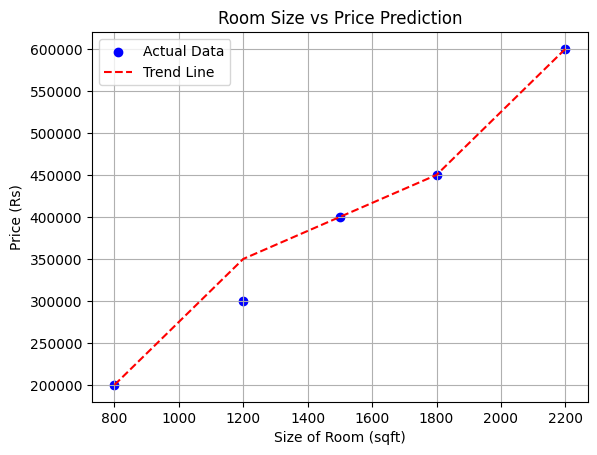

In [16]:

# Optional: Plot feature vs price trend
plt.scatter(df["Size"], df["Price"], color='blue', label="Actual Data")
plt.plot(df["Size"], model.predict(df[["Rooms", "Size", "Location"]]), color='red', linestyle='--', label="Trend Line")
plt.xlabel("Size of Room (sqft)")
plt.ylabel("Price (Rs)")
plt.title(f"Room Size vs Price Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
df_index=pd.read_csv("economic_index.csv")

In [19]:
df_index.head()

,id,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [20]:
df_index.isnull().sum()

id                   0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


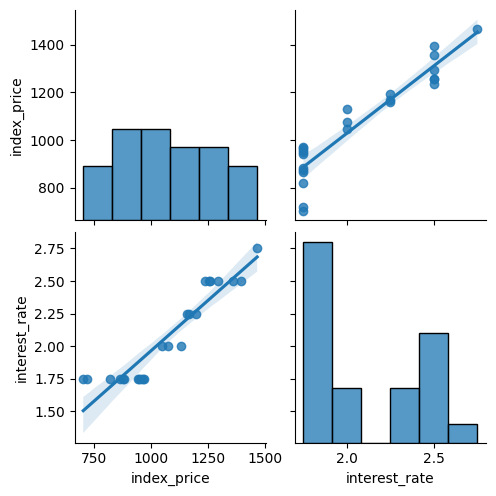

In [21]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(df_index[['index_price', 'interest_rate']],kind='reg')

In [22]:
df_index.corr()

,id,year,month,interest_rate,unemployment_rate,index_price
id,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000
